**Problem Statement:**
*Use Keras to build and train a deep neural network for handwritten digit classification (MNIST). Visualize training history.*

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [63]:
# Step 1: Load and preprocess MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [64]:
X_train.shape

(60000, 28, 28)

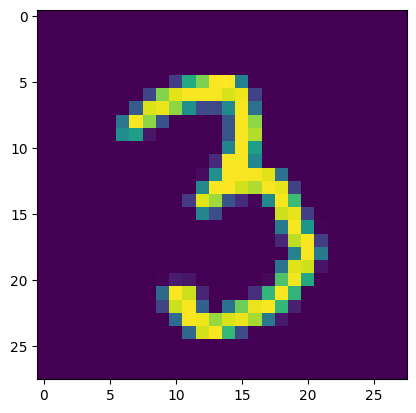

In [65]:
import matplotlib.pyplot as plt
plt.imshow(X_train[30000])

In [66]:
# make the values of X_traun and X_test between 0 to 1, divided by 255
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

#to_categorical() -> converts numeric labels (0–9) into one-hot vectors.
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [67]:
# build ANN model
model = Sequential()

model.add(Flatten(input_shape =(28, 28)))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [68]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [69]:
history = model.fit (X_train, y_train_cat,
  epochs =10,
  batch_size =128,
  validation_split =0.2,
  verbose=1
)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.8182 - loss: 0.5874 - val_accuracy: 0.9583 - val_loss: 0.1388
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9573 - loss: 0.1353 - val_accuracy: 0.9678 - val_loss: 0.1037
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9707 - loss: 0.0939 - val_accuracy: 0.9742 - val_loss: 0.0830
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9787 - loss: 0.0691 - val_accuracy: 0.9693 - val_loss: 0.0965
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9832 - loss: 0.0550 - val_accuracy: 0.9758 - val_loss: 0.0838
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9846 - loss: 0.0483 - val_accuracy: 0.9737 - val_loss: 0.0894
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9862 - loss: 0.0409 - val_accuracy: 0.9755 - val_loss: 0.0891
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9872 - loss: 0.0396 - val_acc

In [70]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [71]:
# Step 5: Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test_cat , verbose =0)
print (f"Test Accuracy : { test_acc:.4f}")

Test Accuracy : 0.9805


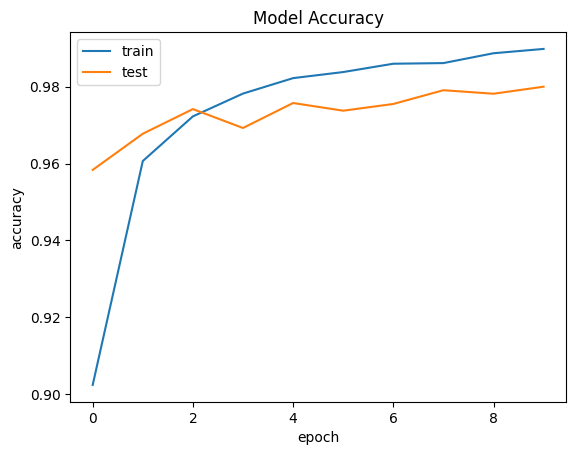

In [72]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

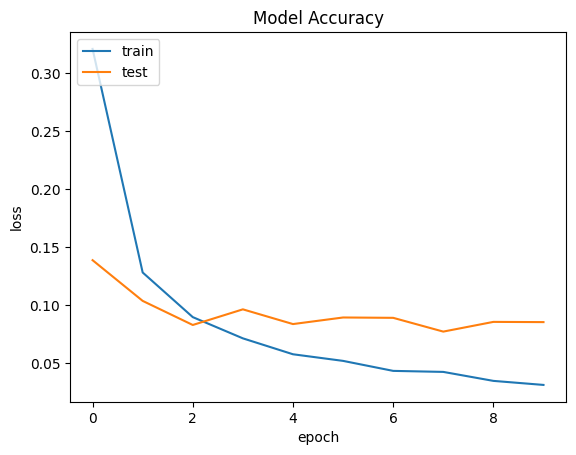

In [73]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()